<a href="https://colab.research.google.com/github/yuji-sgs/web-optimization/blob/main/CTA_improvement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# はじめに
## 本ノートブックの目的
**メディアのCTAを改善した際の定量的評価を行い、意味のある改善にしていく。**

In [ ]:
# 必要なモジュールの読み込み
import numpy as np
from matplotlib import pyplot as plt
import pymc as pm
plt.style.use('grayscale')
plt.style.use('seaborn-whitegrid')
np.random.seed(0)

<ipython-input-1-e7cb73c55926>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# 表示回数に対するクリック数の事後分布の可視化＆定量的評価（サンプルケース）

In [ ]:
N = 40  # 表示数(仮)
a = 2   # クリック数（仮）

with pm.Model() as model:
  theta = pm.Uniform('theta', lower=0, upper=1)
  obs = pm.Binomial('a', p=theta, n=N, observed=a)
  trace = pm.sample(5000, chains=2)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


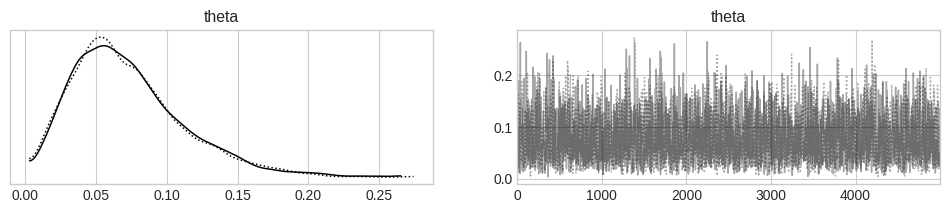

In [ ]:
# 事後分布からのサンプルの可視化
with model:
  pm.plot_trace(trace)

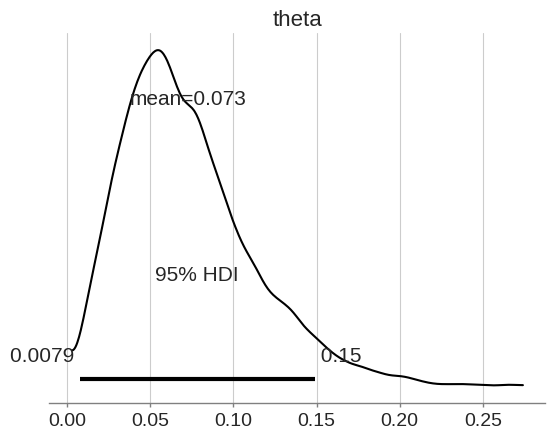

In [ ]:
with model:
  pm.plot_posterior(trace, hdi_prob=0.95)

In [ ]:
# 仮説：表示数に対するクリック率は1％以上である。
# 定量的評価：新たな確率変数𝛿=θ-0.01のサンプルが95%の確率で正になる。
theta_samples = trace.posterior['theta'].values.flatten()
print((theta_samples - 0.01 > 0).mean())

0.9916


## 2つの表示回数に対するクリック数のデータがあり、それらの事後分布の可視化＆定量的評価（サンプルケース）

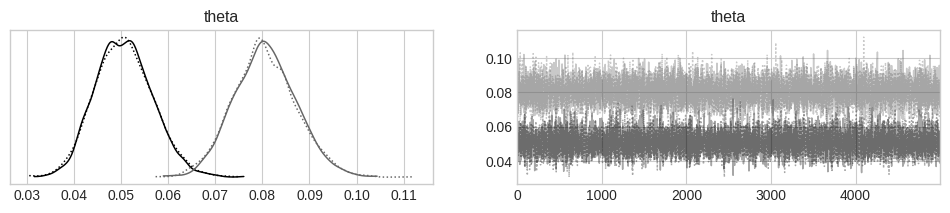

In [ ]:
plan_A = [1280, 64] # [表示回数, クリック数]
plan_B = [1600, 128] # [表示回数, クリック数]

with pm.Model() as model:
  theta = pm.Uniform('theta', lower=0, upper=1, shape=2)
  obs = pm.Binomial('obs', p=theta, n=[plan_A[0], plan_B[0]], observed=[plan_A[1], plan_B[1]])
  trace = pm.sample(5000, chains=2)
  pm.plot_trace(trace, ['theta'], compact=True)

In [ ]:
# 仮説：B案のクリック率はA案よりも大きい
# 定量的評価：新たな確率変数𝛿=θB-θAのサンプルが95%の確率で正の値になる
theta_A = trace.posterior['theta'].sel(theta_dim_0=0).values.flatten()
theta_B = trace.posterior['theta'].sel(theta_dim_0=1).values.flatten()
print((theta_B - theta_A > 0).mean())

0.9993


## **[SWELL 完全ガイド]**
- URL：https://sgs-prog.com/swell-perfect-guide/
- CTA導線：記事の冒頭

### 改善前（〜12/14）
- 導線
  - ボタン
  - 文言：SWELL公式サイトを見る
  - CTA周りの訴求文言：＼ 　SWELL公式サイトはこちら　／

In [ ]:
N = 584  # 表示数
a = 4   # クリック数

with pm.Model() as model:
  theta = pm.Uniform('theta', lower=0, upper=1)
  obs = pm.Binomial('a', p=theta, n=N, observed=a)
  trace_swell_guide = pm.sample(5000, chains=2)

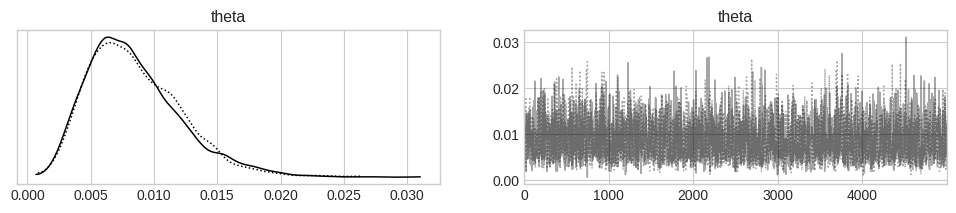

In [ ]:
# 事後分布からのサンプルの可視化
with model:
  pm.plot_trace(trace)

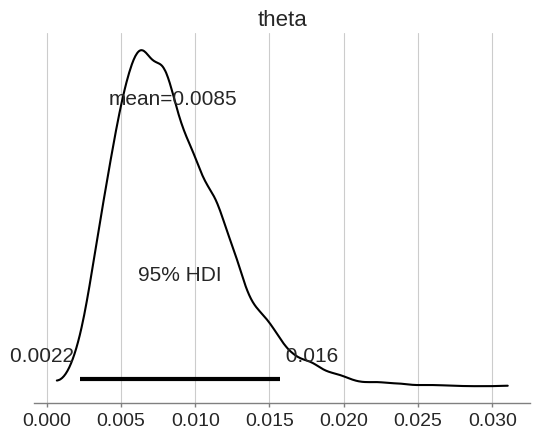

In [ ]:
with model:
  pm.plot_posterior(trace, hdi_prob=0.95)

### 改善後（12/14〜）
- 導線
  - テキスト＋リンク
  - 文言：SWELLを公式サイトから導入する
  - CTA周りの文言：記事のポイントの中にCTAを追加
- 改善の中での仮説
  - 自分も含めほとんどの人は長文を読みたくないため、記事の冒頭に要約を入れつつ、その中で導線を設置してあげることで、ユーザーのニーズに応えつつ、記事のゴール（=CV誘導）を提示できるのではないか？


## **[SWELL コーポレートサイト]**
- URL：https://sgs-prog.com/swell-cafe-homepage-develop1/
- CTA導線：記事の冒頭

### 改善前（〜12/23）
- 導線
  - ボタン
  - 文言：SWELL公式サイトを見る
  - CTA周りの訴求文言：＼ 　SWELL公式サイトはこちら　／

In [ ]:
N = 6773  # 表示数
a = 39   # クリック数

with pm.Model() as model:
  theta = pm.Uniform('theta', lower=0, upper=1)
  obs = pm.Binomial('a', p=theta, n=N, observed=a)
  trace_swell_corporatesite = pm.sample(5000, chains=2)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


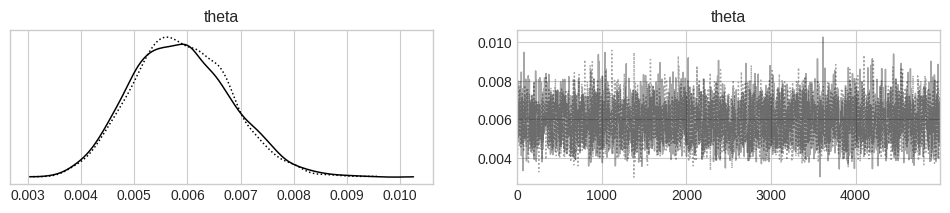

In [ ]:
# 事後分布からのサンプルの可視化
with model:
  pm.plot_trace(trace_swell_corporatesite)

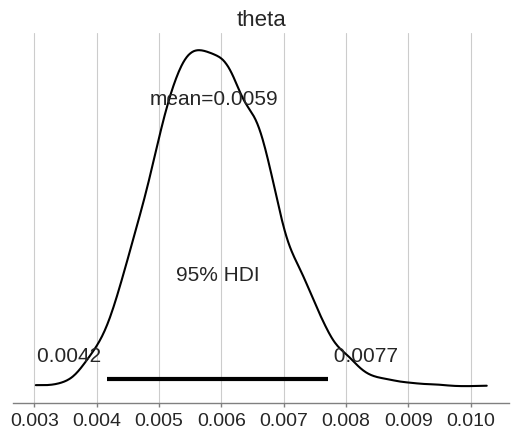

In [ ]:
with model:
  pm.plot_posterior(trace_swell_corporatesite, hdi_prob=0.95)

### 改善後（12/23〜）
- 導線
  - アフィリエイト型
  - 文言：SWELLを公式サイトから導入する
  - デザイン・機能面・サポート面、どれを取っても国内最高峰。気軽に楽しくコーポレートサイトを作れます。

## **[SWELL レビュー]**
- https://sgs-prog.com/swell-review/
- CTA導線：記事の冒頭

### 改善前（〜12/23）
- 導線
  - ボタン
  - 文言：SWELL公式サイトを見る
  - CTA周りの訴求文言：＼ 　SWELL公式サイトはこちら　／

In [ ]:
N = 495  # 表示数
a = 5   # クリック数

with pm.Model() as model:
  theta = pm.Uniform('theta', lower=0, upper=1)
  obs = pm.Binomial('a', p=theta, n=N, observed=a)
  trace_swell_review = pm.sample(5000, chains=2)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


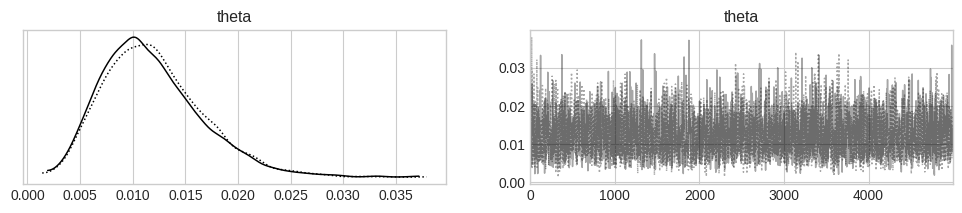

In [ ]:
# 事後分布からのサンプルの可視化
with model:
  pm.plot_trace(trace_swell_review)

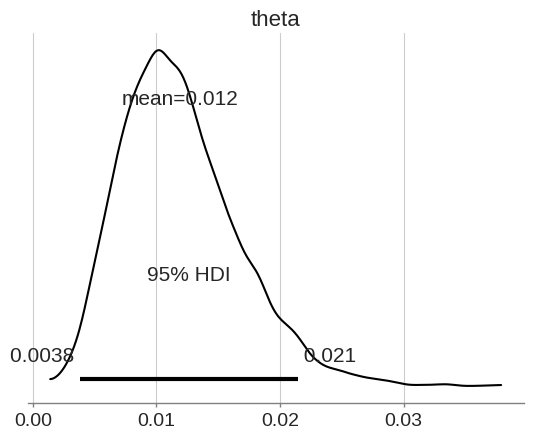

In [ ]:
with model:
  pm.plot_posterior(trace_swell_review, hdi_prob=0.95)

### 改善後（12/23〜）
- 導線
  - アフィリエイト型
  - 文言：SWELLを公式サイトから導入する
  - デザイン・機能面・サポート面、どれを取っても国内最高峰。気軽に楽しくコーポレートサイトを作れます。